In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

pd.set_option("display.float_format", lambda x: "{:.3f}".format(x))

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("shape of train data = {}\n shape of test data = {}".format(train.shape, test.shape))

shape of train data = (1460, 81)
 shape of test data = (1459, 80)


In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


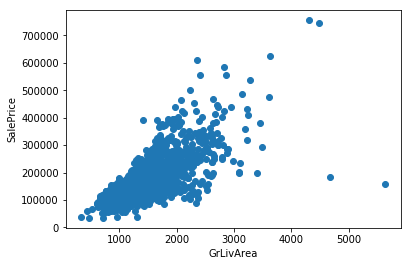

In [5]:
# remove outliers

plt.scatter(train["GrLivArea"], train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [6]:
train.drop(train[(train["GrLivArea"] > 4000) & (train["SalePrice"] < 300000)].index, axis = 0, inplace = True)

In [7]:
train.shape[0]

1458

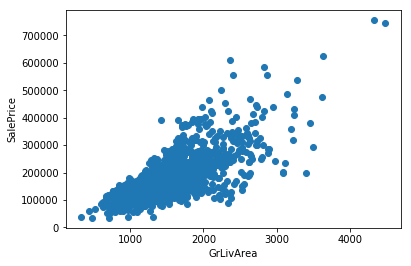

In [8]:
plt.scatter(train["GrLivArea"], train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

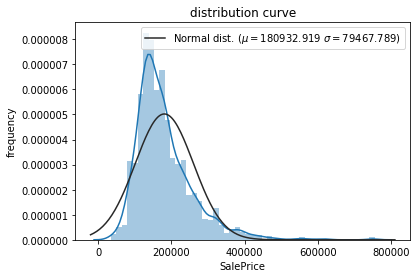

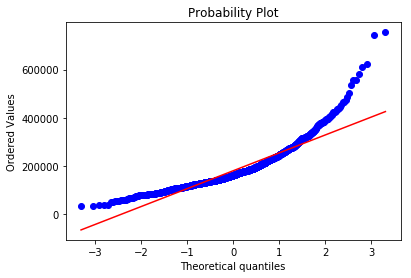

In [9]:
# investigate target data

sns.distplot(train["SalePrice"], fit = norm)

# get parameters
mu, sigma = norm.fit(train["SalePrice"].values)

# get distribution plot
plt.legend(["Normal dist. ($\mu=${:.3f} $\sigma=${:.3f})".format(mu, sigma)], loc = "best")
plt.ylabel("frequency")
plt.title("distribution curve")

# get qq-plot
fig = plt.figure()
res = stats.probplot(train["SalePrice"].values, plot = plt)
plt.show()

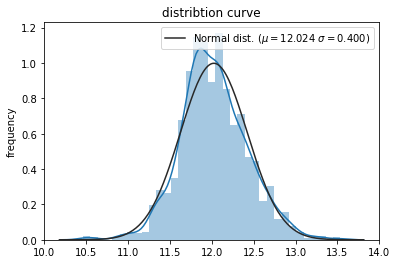

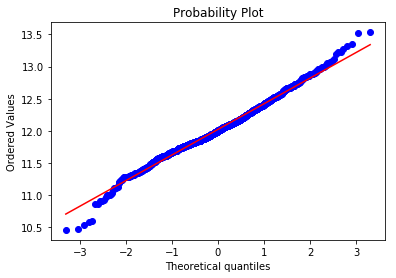

In [10]:
# normalize data so that linear regrssion works better

train["SalePrice"] = np.log1p(train["SalePrice"].values)

sns.distplot(train["SalePrice"].values, fit = norm)

# get new parameters
mu, sigma = norm.fit(train["SalePrice"].values)

# get new distribution plot
plt.legend(["Normal dist. ($\mu=${:.3f} $\sigma=${:.3f})".format(mu, sigma)], loc = "best")
plt.ylabel("frequency")
plt.title("distribtion curve")

# get new qq-plot
fig = plt.figure()
res = stats.probplot(train["SalePrice"].values, plot = plt)
plt.show()

In [11]:
# get total data for data preprocessing

y_train = train["SalePrice"]

# drop Id as it contributes to nothing
trainId = train["Id"]
testId = test["Id"]

# store row index and column index to split data afterwards
ntrain = train.shape[0]
ntest = train.shape[0]

# drop target value from train set
train.drop(["SalePrice"], axis = 1, inplace = True)

# concatenate data to get whole value
all_data = pd.concat((train, test)).reset_index(drop = True)

print("all_data shape : {}".format(all_data.shape))

all_data shape : (2917, 80)


In [12]:
# investigate for missing values

miss_data = (all_data.isnull().sum()/len(all_data))*100

miss_data = miss_data.drop(miss_data[miss_data == 0].index).sort_values(ascending = False)

miss_data = pd.DataFrame({
    "MissingVal" : miss_data
})

miss_data.head(10)

,MissingVal
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageYrBlt,5.451
GarageQual,5.451
GarageCond,5.451


In [13]:
miss_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF'],
      dtype='object')

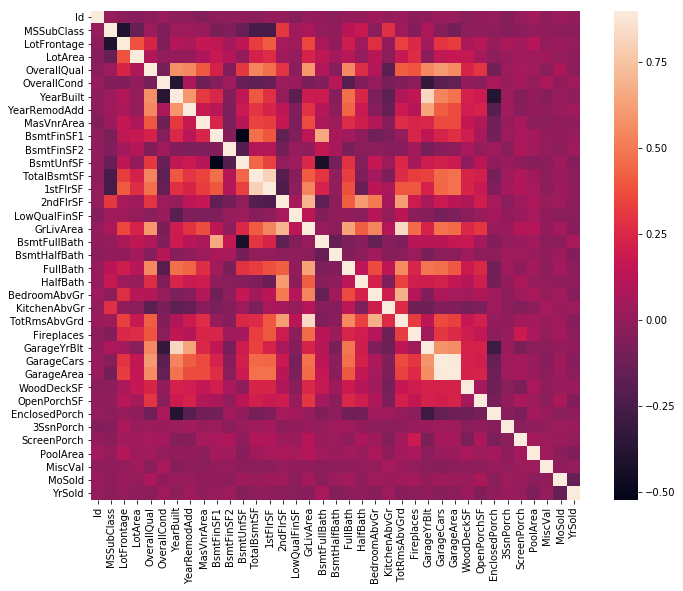

In [14]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [15]:
all_data.drop(['Id'], axis = 1, inplace = True)

In [16]:
# impute missing values

all_data["PoolQC"].fillna("None", inplace = True)

In [17]:
miss_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF'],
      dtype='object')

In [18]:
all_data["MiscFeature"].fillna("None", inplace = True)

In [19]:
all_data["Alley"].fillna("None", inplace = True)

In [20]:
all_data["Fence"].fillna("None", inplace = True)

In [21]:
all_data["FireplaceQu"].fillna("None", inplace = True)

In [22]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x : x.fillna(x.median()))

In [23]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col].fillna("None", inplace = True)
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data.fillna(0, inplace = True)

In [24]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0, inplace = True)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna("None", inplace = True)

In [25]:
all_data["MasVnrArea"].fillna(0, inplace = True)
all_data["MasVnrType"].fillna("None", inplace = True)

In [26]:
miss_data

,MissingVal
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageYrBlt,5.451
GarageQual,5.451
GarageCond,5.451


In [27]:
all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0], inplace = True)

In [28]:
all_data.drop(["Utilities"], axis = 1, inplace = True)

In [29]:
all_data["Functional"].fillna("Typ", inplace = True)

In [30]:
all_data["Exterior1st"].mode()[0]

'VinylSd'

In [31]:
all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0], inplace = True)
all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0], inplace = True)

In [32]:
all_data["SaleType"].fillna(all_data["SaleType"].mode()[0], inplace = True)
all_data["MSSubClass"].fillna("None", inplace = True)

In [33]:
miss_data = (all_data.isnull().sum()/len(all_data))*100

miss_data = miss_data.drop(miss_data[miss_data == 0].index).sort_values(ascending = False)

miss_data = pd.DataFrame({
    "MissingVal" : miss_data
})

miss_data.head(10)

,MissingVal


In [34]:
# Transforming numerical data which are really categorical

all_data["MSSubClass"] = all_data["MSSubClass"].apply(str)

all_data["OverallCond"] = all_data["OverallCond"].astype(str)

all_data["YrSold"] = all_data["YrSold"].astype(str)
all_data["MoSold"] = all_data["MoSold"].astype(str)

In [35]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    encoder = LabelEncoder()
    encoder.fit(all_data[col].astype(str))
    all_data[col] = encoder.transform(all_data[col].astype(str))
    
print("shape of all_data : {}".format(all_data.shape))

shape of all_data : (2917, 78)


In [36]:
all_data.shape

(2917, 78)

In [37]:
all_data["TotalSF"] = all_data["TotalBsmtSF"] + all_data["2ndFlrSF"] + all_data["1stFlrSF"]

In [38]:
num_features = all_data.dtypes[all_data.dtypes != "object"].index

# check skew of all numeric features
skewed_features = all_data[num_features].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({
    "Skewness" : skewed_features
})
skewness.head(10)

,Skewness
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [39]:
# filter features which require normal transformation
skewness = skewness[abs(skewness) > 0.75]
print("features that need normalization : {}".format(skewness.shape[0]))

from scipy.special import boxcox1p

skewed_feature_index = skewness.index

lam = 0.15

for feature_index in skewed_feature_index:
    all_data[feature_index] = boxcox1p(all_data[feature_index], lam)

features that need normalization : 59


In [40]:
all_data = pd.get_dummies(all_data)

In [41]:
all_data.shape

(2917, 226)

In [42]:
# split data for training and testing

train = all_data[:ntrain]
test = all_data[ntrain:]

In [43]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import clone, BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [50]:
# define cross validation strategy

n_folds = 5

def model_selection_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring = "neg_mean_squared_error", cv = kf))
    return rmse

In [45]:
# base models

# Lasso, sensitive to outliers, make robust using RobustScaler
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0003, random_state = 2))

# ElasticsNet, sensitive to outliers
enet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0003, l1_ratio = 0.9, random_state = 3))

# Kernel ridge regressor 
krr = KernelRidge(alpha = 0.3, kernel = "polynomial", degree = 2, coef0 = 3.3)

# Gradient Boost regressor, with huber loss to make robust
gbr = GradientBoostingRegressor(n_estimators = 3333, learning_rate = 0.03,
                                   max_depth = 3, max_features = 'sqrt',
                                   min_samples_leaf = 13, min_samples_split = 11, 
                                   loss = 'huber', random_state = 5)

In [47]:
import xgboost as xgb
import lightgbm as lgbm

In [48]:
# XGBRegressor
xgb_model = xgb.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, 
                             learning_rate = 0.03, max_depth = 3, 
                             min_child_weight = 1.7817, n_estimators = 3300,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             random_state = 7, nthread = -1)

# LGBMRgressor
lgbm_model = lgbm.LGBMRegressor(objective = "regression", num_leaves = 7,
                              learning_rate = 0.03, n_estimators = 720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

In [51]:
score = model_selection_cv(lasso)
print("lasso score : {}".format(score))

score = model_selection_cv(enet)
print("ElasticNet score : {}".format(score))

score = model_selection_cv(krr)
print("KRR score : {}".format(score))

score = model_selection_cv(gbr)
print("GBR score : {}".format(score))

score = model_selection_cv(xgb_model)
print("XGB score : {}".format(score))

score = model_selection_cv(lgbm_model)
print("LGBM score : {}".format(score))

lasso score : [0.10338478 0.11523864 0.12473785 0.10572677 0.11070625]
ElasticNet score : [0.1032725  0.11557423 0.12514574 0.10605589 0.11098653]
KRR score : [0.10711336 0.121052   0.13144226 0.11203613 0.11242402]
GBR score : [0.10506755 0.12255253 0.12108865 0.10668752 0.11331246]
XGB score : [0.11195327 0.1206784  0.12355448 0.11181353 0.11829078]
LGBM score : [0.10874106 0.12205613 0.12285867 0.11044922 0.10996022]


In [53]:
class AverageModels(TransformerMixin, RegressorMixin, BaseEstimator):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)
            
        return self
    
    def predict(self, X):
        prediction = np.column_stack([model.predict(X) for model in self.models_])
        
        return np.mean(prediction, axis = 1)

In [55]:
simple_avg_model = AverageModels(models = (lasso, enet, krr, xgb_model, lgbm_model))
score = model_selection_cv(simple_avg_model)
print("simple_average_model mean score : {:.3f} and standard deviation : {:.3f}".format(score.mean(), score.std()))

simple_average_model mean score : 0.109 and standard deviation : 0.007


In [70]:
# advanced stacking of models

"""Main idea is of predicting the target feature by training the meta model
with target features predicted by other models"""

class StackingAveragedModels(TransformerMixin, RegressorMixin, BaseEstimator):
    
    def __init__(self, base_models, meta_model, n_folds = 5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    """fit the data in cloned base models and train in cloned meta model"""
    
    def fit(self, X, y):
        self.base_models_ = [list() for model in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits = self.n_folds, shuffle = True, random_state = 211)
        
        """fit data in cloned base models to get out-of-folds predictions
        which is used to train the meta-model"""
        
        out_of_fold_prediction = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_.append(instance)
            
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                
                out_of_fold_prediction[holdout_index, i] = y_pred
                # print to understand working
                print(out_of_fold_prediction)
                
        """train the meta model with out-of-fold prediction"""
                
        self.meta_model_.fit(out_of_fold_prediction, y)
        
        return self
    
    """take predictions from all base models and use that
    as features to pedict result for the meta model"""
    
    def predict(self, X):
            meta_features = np.column_stack([
                np.column_stack([model.predict for model in base_models]).mean(axis = 1)
                for base_models in self.base_models_
            ])
            fpred = self.meta_model_.predict(meta_features)
            
            return fpred